* This dataset contains the positions and velocities of simulated stars (particles) in a direct N-body simulation of a star cluster. In the cluster there are initially 64000 stars distributed in position-velocity space according to a King model [3]. Each .csv file named c_xxxx.csv corresponds to a snapshot of the simulation at time t = xxxx. For example, c_0000.csv contains the initial conditions (positions and velocities of stars at time t=0). Times are measured in standard N-body units [4]. This is a system of units where G = M = −4E = 1 (G is the gravitational constant, M the total mass of the cluster, and E its total energy).

* x, y, z
Columns 1, 2, and 3 of each file are the x, y, z positions of the stars. They are also expressed in standard N-body units [4]. You can switch to units of the median radius of the cluster by finding the cluster center and calculating the median distance of stars from it, and then dividing x, y, and z by this number. In general, the median radius changes in time. The initial conditions are approximately spherically symmetric (you can check) so there is no particular physical meaning attached to the choice of x, y, and z.

* vx, vy, vz
Columns 4, 5, and 6 contain the x, y, and z velocity, also in N-body units. A scale velocity for the stars can be obtained by taking the standard deviation of velocity along one direction (e.g. z). You may check that the ratio between the typical radius (see above) and the typical velocity is of order unity.

* m
Column 7 is the mass of each star. For this simulation this is identically 1.5625e-05, i.e. 1/64000. The total mass of the cluster is initially 1. More realistic simulations (coming soon) have a spectrum of different masses and live stelar evolution, that results in changes in the mass of stars. This simulation is a pure N-body problem instead.

* Star id number
The id numbers of each particle are listed in the last column (8) of the files under the header "id". The ids are unique and can be used to trace the position and velocity of a star across all files. There are initially 64000 particles. At end of the simulation there are 63970. This is because some particles escape the cluster.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data= pd.read_csv("c_0000.csv")
data.head()

,x,y,z,vx,vy,vz,m,id
0,0.485939,-0.524359,-0.531982,0.461539,-0.033776,-0.322765,0.000016,1
1,-0.065961,0.080844,-0.276031,-0.575780,1.107815,-0.293408,0.000016,2
2,-0.034809,0.076795,-0.390880,-0.553991,-0.173861,0.059251,0.000016,3
3,1.502104,1.442983,1.449747,-0.090266,0.326612,-0.310594,0.000016,4
4,-0.009554,0.538341,-0.267264,0.011855,-0.011874,-0.405565,0.000016,5


In [5]:
data.shape

(64000, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       64000 non-null  float64
 1   y       64000 non-null  float64
 2   z       64000 non-null  float64
 3   vx      64000 non-null  float64
 4   vy      64000 non-null  float64
 5   vz      64000 non-null  float64
 6   m       64000 non-null  float64
 7   id      64000 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 3.9 MB


In [7]:
data.isna().sum()

x     0
y     0
z     0
vx    0
vy    0
vz    0
m     0
id    0
dtype: int64

In [8]:
data.describe()

,x,y,z,vx,vy,vz,m,id
count,6.400000e+04,6.400000e+04,6.400000e+04,6.400000e+04,6.400000e+04,6.400000e+04,6.400000e+04,64000.000000
mean,-1.176595e-10,3.412734e-10,2.464757e-10,1.101956e-10,2.103394e-10,1.820625e-11,1.562500e-05,32000.500000
std,7.807475e-01,7.814718e-01,7.719907e-01,4.088337e-01,4.078873e-01,4.080323e-01,6.776317e-21,18475.352951
min,-4.698981e+00,-5.095714e+00,-5.015129e+00,-1.619203e+00,-1.482613e+00,-1.685246e+00,1.562500e-05,1.000000
25%,-3.348222e-01,-3.366134e-01,-3.356278e-01,-2.697400e-01,-2.714544e-01,-2.709821e-01,1.562500e-05,16000.750000
50%,-4.818202e-04,-4.321573e-04,-3.949339e-03,-2.090700e-04,1.419134e-03,1.770830e-04,1.562500e-05,32000.500000
75%,3.347058e-01,3.321014e-01,3.305091e-01,2.691137e-01,2.707544e-01,2.700553e-01,1.562500e-05,48000.250000
max,5.401047e+00,5.680950e+00,4.762590e+00,1.547319e+00,1.584202e+00,1.600681e+00,1.562500e-05,64000.000000


#### Preprocessing 

In [9]:
# id column has no effect
data.drop("id",axis=1,inplace=True)

In [11]:
columns=data.columns 
columns

Index(['x', 'y', 'z', 'vx', 'vy', 'vz', 'm'], dtype='object')

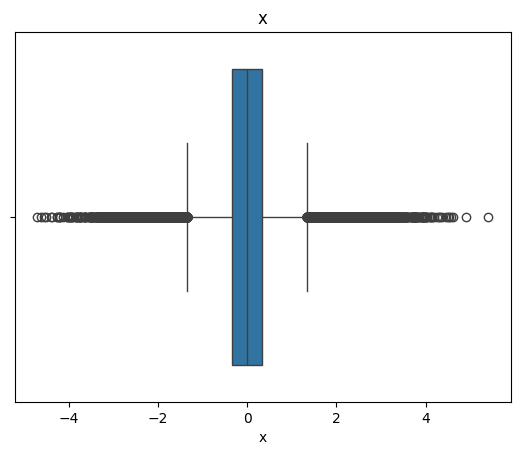

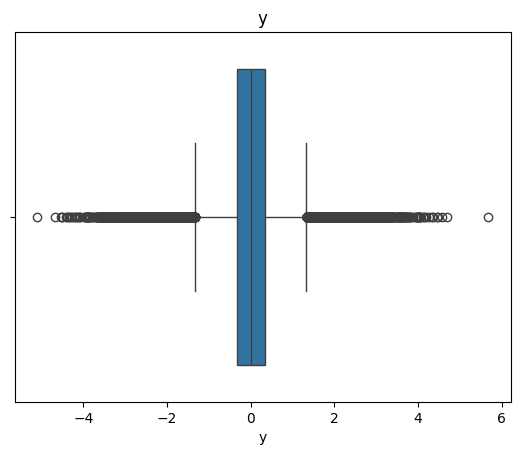

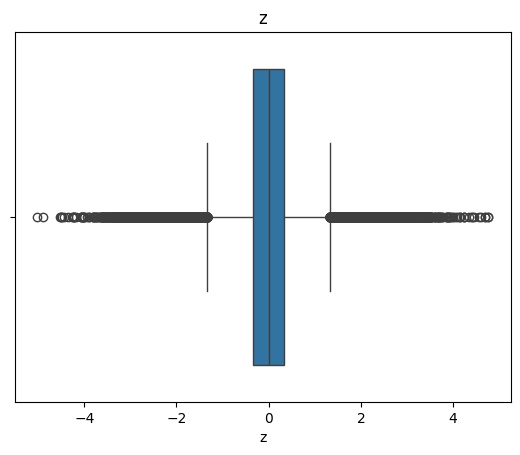

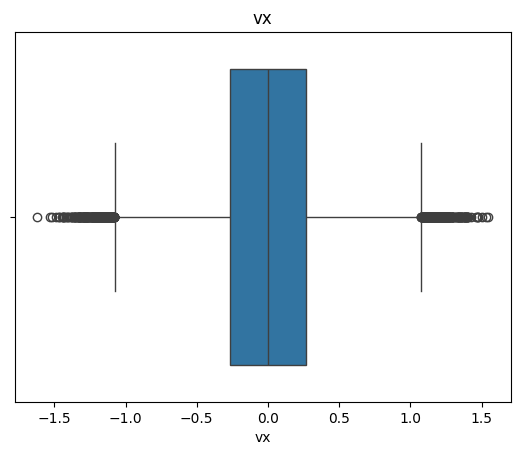

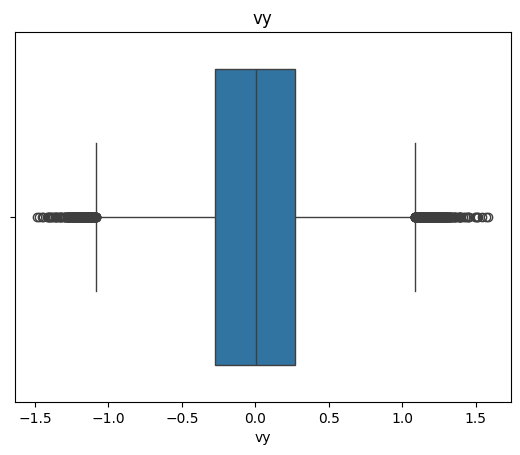

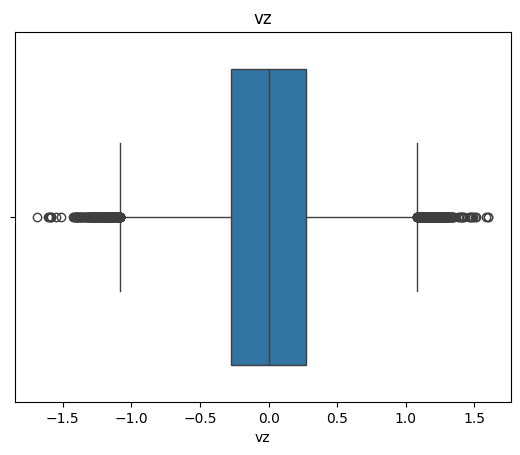

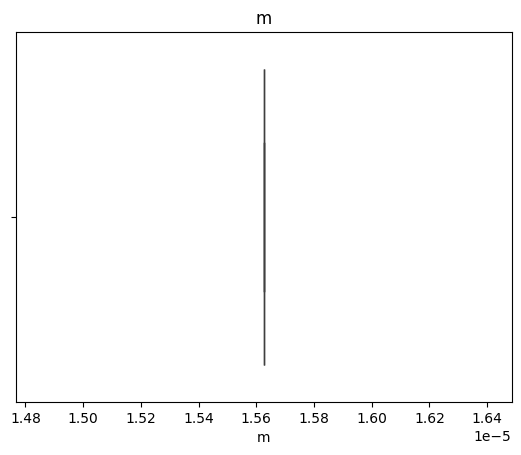

In [14]:
for x in columns:
    sns.boxplot(data[x],orient='h')
    plt.title(x)
    plt.show()

* from this we can understand that most of the columns has outliers

In [15]:
columns = columns[columns != 'm']
for x in columns:
    print(x)
    descr = data[x].describe()
    IQR = descr['75%'] - descr['25%']
    upper_limit =  descr['75%'] + 1.5 * IQR
    upper_limit = np.int64(upper_limit)
    lower_limit =  descr['25%'] - 1.5 * IQR  
    lower_limit=np.int64(lower_limit)
    #outlier replacement
    data.loc[data[x] > upper_limit, x] = upper_limit
    data.loc[data[x] < lower_limit, x] = lower_limit

x
y
z
vx
vy
vz


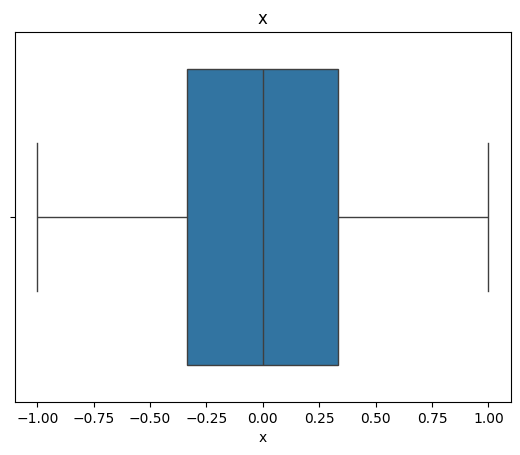

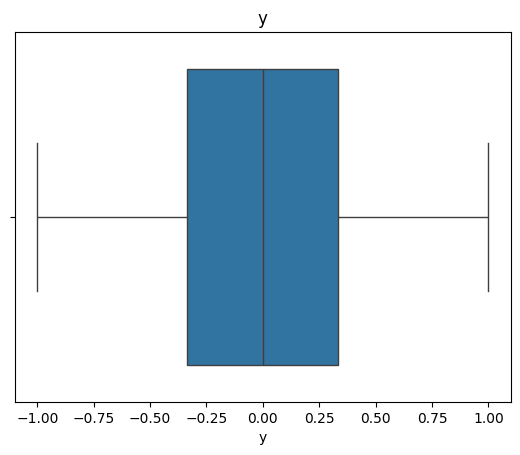

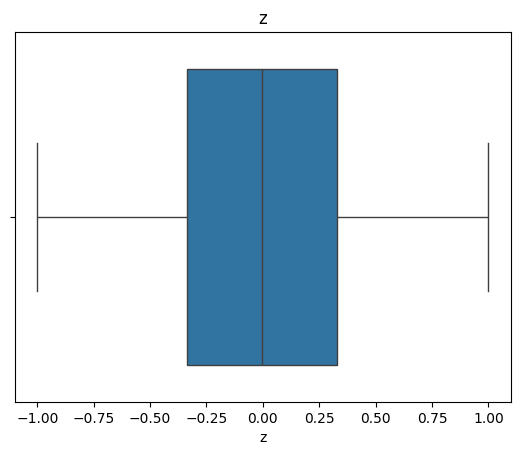

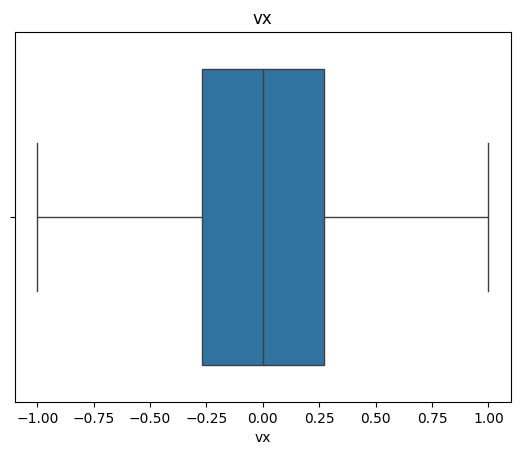

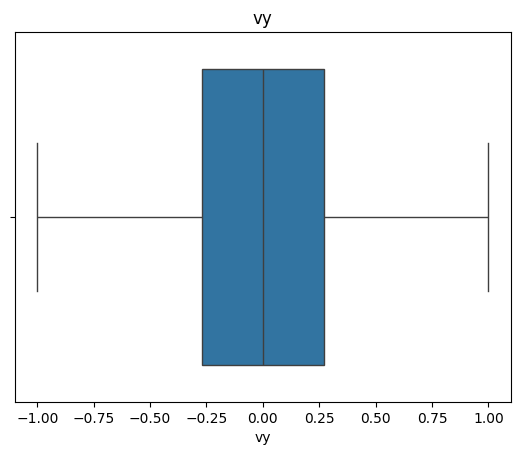

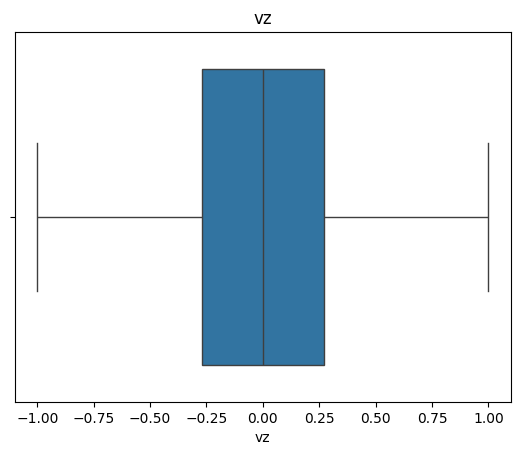

In [16]:
for x in columns:
    sns.boxplot(data[x],orient='h')
    plt.title(x)
    plt.show()

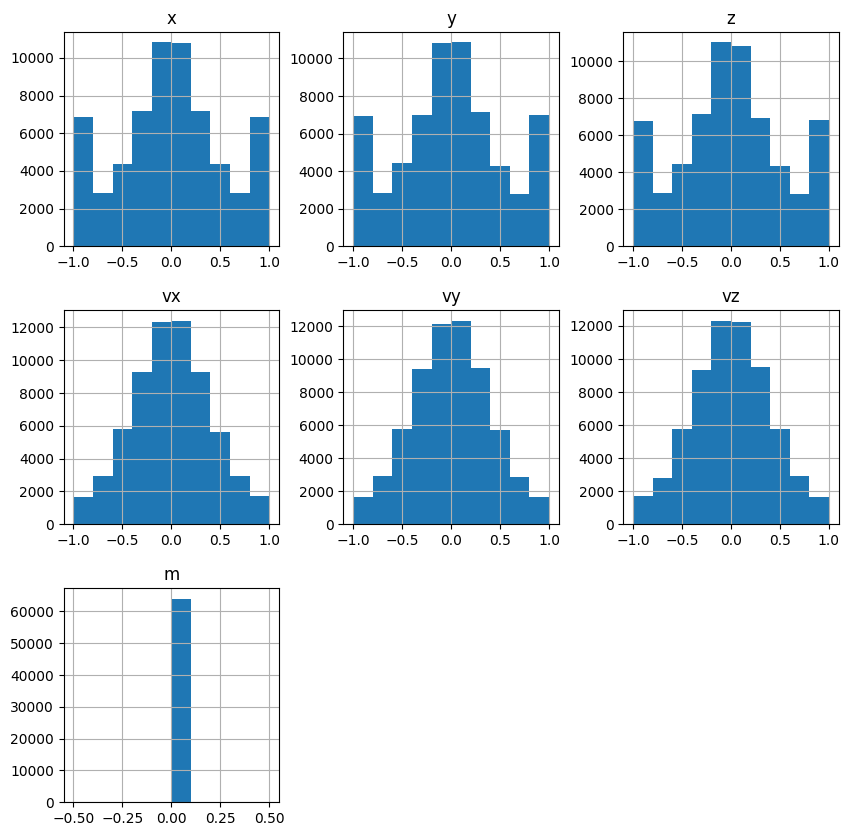

In [17]:
#hisogram
data.hist(figsize=(10,10));

#### correlation 

In [18]:
data.corr()

,x,y,z,vx,vy,vz,m
x,1.000000,-0.004466,-0.004035,0.000499,0.001687,0.001467,NaN
y,-0.004466,1.000000,0.003349,0.002876,0.000099,-0.002015,NaN
z,-0.004035,0.003349,1.000000,0.002692,0.000432,0.004199,NaN
vx,0.000499,0.002876,0.002692,1.000000,0.001779,0.006298,NaN
vy,0.001687,0.000099,0.000432,0.001779,1.000000,0.002544,NaN
vz,0.001467,-0.002015,0.004199,0.006298,0.002544,1.000000,NaN
m,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

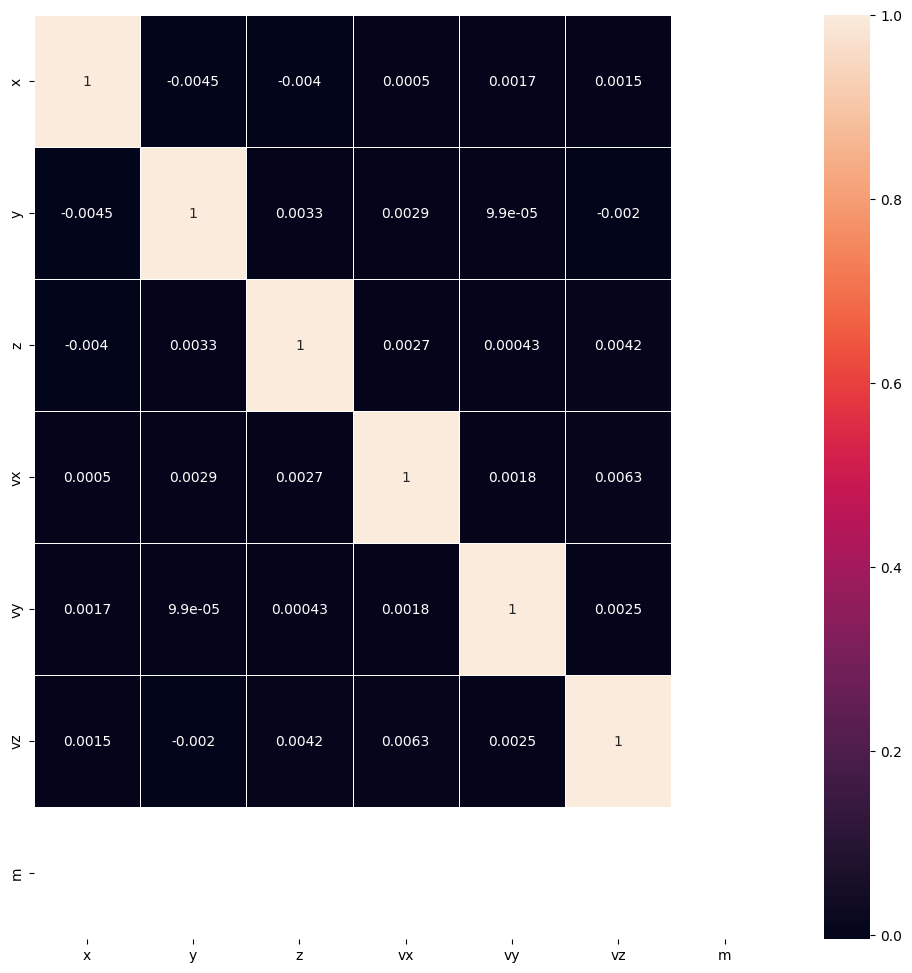

In [19]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,linewidths=0.6)

 * from this we can understand the correlation between the variable are very poor

### K_MEANS

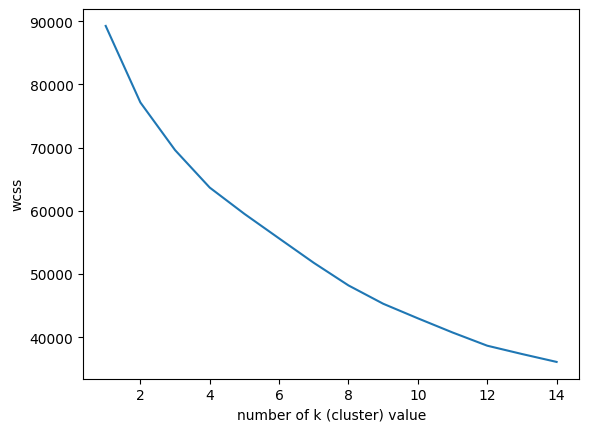

In [24]:
from sklearn.cluster import  KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_) # inertia means that find to value of wcss
    
plt.plot(range(1,15),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()


* we can choose k as 7  by using elbow method

In [41]:
kmeans = KMeans(n_clusters=7, n_init=10)
clusters = kmeans.fit_predict(data)
clusters

array([1, 2, 2, ..., 2, 2, 6])

In [42]:
data["cluster no"]=clusters
data.head(10)

,x,y,z,vx,vy,vz,m,cluster no
0,0.485939,-0.524359,-0.531982,0.461539,-0.033776,-0.322765,0.000016,1
1,-0.065961,0.080844,-0.276031,-0.575780,1.000000,-0.293408,0.000016,2
2,-0.034809,0.076795,-0.390880,-0.553991,-0.173861,0.059251,0.000016,2
3,1.000000,1.000000,1.000000,-0.090266,0.326612,-0.310594,0.000016,2
4,-0.009554,0.538341,-0.267264,0.011855,-0.011874,-0.405565,0.000016,2
5,-0.356017,-0.045705,0.335006,-0.709008,-0.649903,0.397949,0.000016,2
6,-0.397190,-1.000000,-0.757772,0.041345,0.718185,0.422623,0.000016,1
7,-0.916657,0.643472,-0.146350,-0.511860,0.220190,-0.529937,0.000016,0
8,1.000000,0.790756,0.290989,0.292099,0.053339,-0.472290,0.000016,2
9,-0.976209,0.445163,-0.705493,-0.120242,-0.231255,-0.227857,0.000016,0


In [43]:
centers=kmeans.cluster_centers_
centers

array([[-7.01492220e-01,  6.25655829e-01, -2.48611840e-01,
        -5.31085032e-03, -1.00310613e-02,  2.73251323e-04,
         1.56250010e-05,  3.00000000e+00],
       [-1.42113981e-01, -6.55142316e-01, -7.01961607e-01,
        -8.06347244e-03, -7.02664418e-03,  6.93007550e-03,
         1.56250010e-05,  7.00000000e+00],
       [ 1.00496065e-01,  1.96742315e-01,  2.01866064e-01,
        -2.79122581e-01, -2.17697789e-02, -9.40824813e-02,
         1.56250010e-05,  6.91376070e-01],
       [ 6.14846005e-01,  4.72386261e-01, -5.97114837e-01,
         5.93975428e-03, -1.41102421e-02, -5.34760644e-04,
         1.56250010e-05,  5.00000000e+00],
       [ 6.53322594e-01, -6.10804427e-01,  4.24718689e-01,
        -6.61984174e-04, -4.24955228e-03,  1.53836523e-02,
         1.56250010e-05,  4.00000000e+00],
       [-4.27802801e-03,  1.82913190e-03, -3.83419050e-03,
         4.12153506e-01,  5.10366311e-02,  1.19989767e-01,
         1.56250010e-05,  2.00000000e+00],
       [-6.46021024e-01, -4.596783

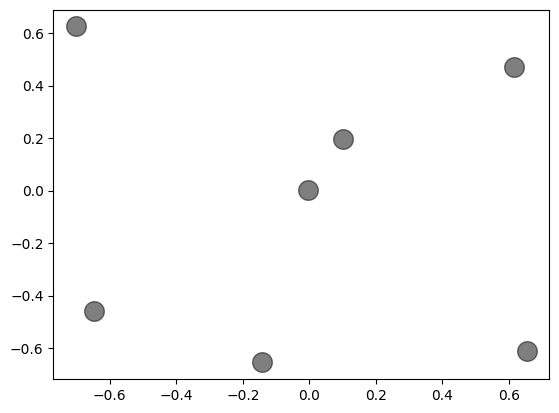

In [44]:
plt.scatter(centers[:,0],centers[:,1],c="black",s=200,alpha=0.5);

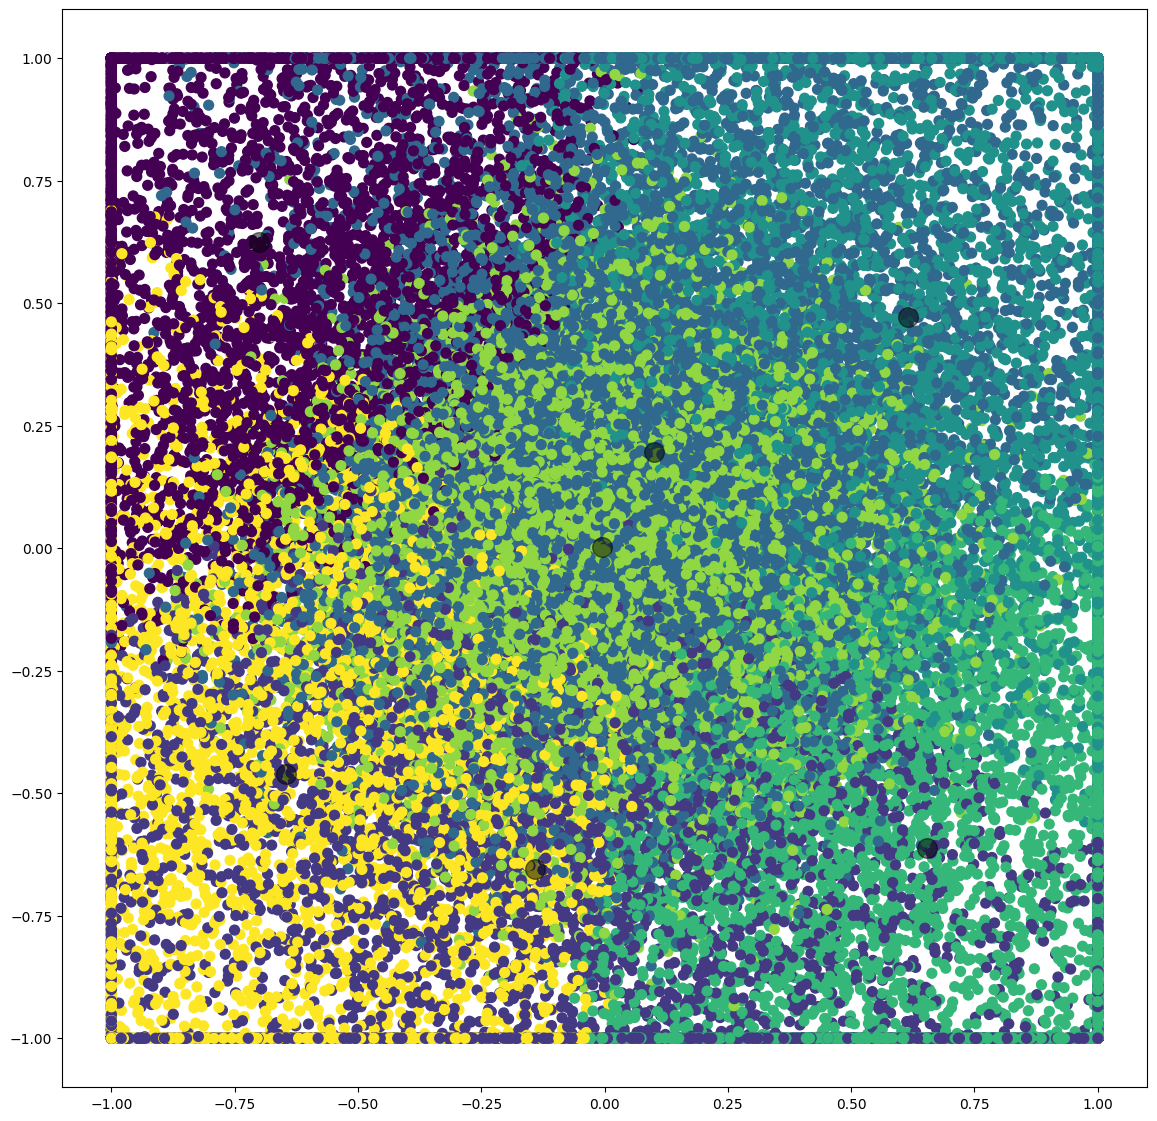

In [45]:
plt.figure(figsize=(14,14))
plt.scatter(data.iloc[:,0],data.iloc[:,1],c=clusters,s=50,cmap="viridis")
plt.scatter(centers[:,0],centers[:,1],c="black",s=200,alpha=0.5);

* conuclusion: We divided our dataset consisting of 64000 stars into 8 different groups